In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/customer_demographics.csv")
df.head(20)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


Проверим уникальные данные по столбцу family_size

In [ ]:
unique_family_sizes = df['family_size'].unique()
unique_family_sizes


array(['2', '3', '4', '1', '5+'], dtype=object)

 Так как в задании указано следующее:  ___"Имейте ввиду, значения нужно привести к числовому виду, можно просто отнести людей к какой-то возрастной группе (1, 2, 3 и т.д.)"___, произведем с исследуемыми столбцами некоторую магию. Создадим новый столбец family_size_num, в котором заменим значения 5+ на значение 5 и заменим на формат float.

In [ ]:
df['family_size_num'] = df['family_size'].replace({'5+': 5}).astype(float)
df.head(20)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,family_size_num
0,1,70+,Married,0,2,NaN,4,2.0
1,6,46-55,Married,0,2,NaN,5,2.0
2,7,26-35,NaN,0,3,1,3,3.0
3,8,26-35,NaN,0,4,2,6,4.0
4,10,46-55,Single,0,1,NaN,5,1.0
5,11,70+,Single,0,2,NaN,1,2.0
6,12,46-55,Married,0,2,NaN,7,2.0
7,13,36-45,Single,0,1,NaN,2,1.0
8,14,26-35,Married,1,2,NaN,6,2.0
9,15,46-55,Married,0,2,NaN,6,2.0


то же самое проделаем со столбцом age_range, но с некоторыми нюансами.

In [ ]:
unique_age_range = df['age_range'].unique()
unique_age_range

array(['70+', '46-55', '26-35', '36-45', '18-25', '56-70'], dtype=object)

Получили шесть возрастных отрезков для анализа, для удобства присвоим этим отрезкам цифровые метки (произведем маппинг данных).

In [ ]:
age_mapping = {
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-55': 4,
    '56-70': 5,
    '70+': 6
}
df['age_range_num'] = df['age_range'].map(age_mapping)
df.head(20)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,family_size_num,age_range_num
0,1,70+,Married,0,2,NaN,4,2.0,6
1,6,46-55,Married,0,2,NaN,5,2.0,4
2,7,26-35,NaN,0,3,1,3,3.0,2
3,8,26-35,NaN,0,4,2,6,4.0,2
4,10,46-55,Single,0,1,NaN,5,1.0,4
5,11,70+,Single,0,2,NaN,1,2.0,6
6,12,46-55,Married,0,2,NaN,7,2.0,4
7,13,36-45,Single,0,1,NaN,2,1.0,3
8,14,26-35,Married,1,2,NaN,6,2.0,2
9,15,46-55,Married,0,2,NaN,6,2.0,4


Убедимся, что нет пропусков в нужных столбцах:

In [ ]:
print(df[['family_size_num', 'age_range_num']].isnull().sum())

family_size_num    0
age_range_num      0
dtype: int64


Описательная статистика. Согласно задания   необходимо:           
- Провести тест Шапиро-Уилка,
- проверку критерия согласия Пирсона,
- найти асимметрию выборки (skewness),
- эксцесс выборки (kurtosis),
- среднее квадратичное отклонение (сигма).
- Подтвердить или опровергнуть гипотезу о нормальном распределении данных


Посмотрим графики (линейный график - density здесь будет не очень подходить, поэтому применим гистограмму):

<Axes: ylabel='Frequency'>

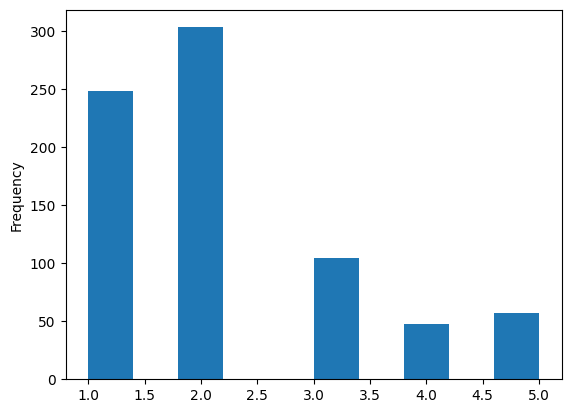

In [ ]:
df['family_size_num'].plot.hist()

<Axes: ylabel='Frequency'>

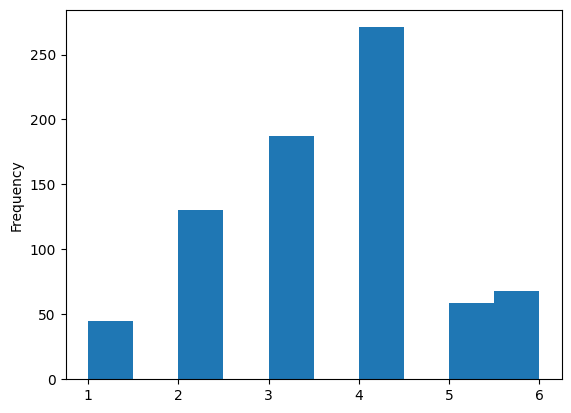

In [ ]:
df['age_range_num'].plot.hist()

Создадим python функции для расчета требуемых метрик:

In [39]:
def describe_distribution(series, name):
    mean = series.mean()
    std = series.std()
    skew = series.skew()
    kurt = series.kurtosis()  # эксцесс (в pandas — это эксцесс минус 3, т.е. "excess kurtosis")

    print(f"--- {name} ---")
    print(f"Среднее: {mean:.3f}")
    print(f"Стандартное отклонение (σ): {std:.3f}")
    print(f"Асимметрия: {skew:.3f}")
    print(f"Эксцесс (excess kurtosis): {kurt:.3f}")
    print()
    return mean, std, skew, kurt

# Анализ
desc_family = describe_distribution(df['family_size_num'], 'family_size')
desc_age = describe_distribution(df['age_range_num'], 'age_range')

--- family_size ---
Среднее: 2.162
Стандартное отклонение (σ): 1.169
Асимметрия: 1.052
Эксцесс (excess kurtosis): 0.367

--- age_range ---
Среднее: 3.491
Стандартное отклонение (σ): 1.281
Асимметрия: 0.103
Эксцесс (excess kurtosis): -0.348



Интерпретируем полученные данные:    

Асимметрия > 0 → правосторонняя асимметрия (хвост справа).    
Эксцесс > 0 → более островершинное, чем нормальное.   
Эксцесс < 0 → более плоское распределение.   

Для проверки гипотезы нормального или ненормального распределения применим функцию расчета теста Шапиро-Уилка на нормальность:

In [40]:
def shapiro_test(series, name):
    stat, p = stats.shapiro(series.dropna())
    print(f"Тест Шапиро-Уилка для {name}:")
    print(f"Статистика = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print("→ Не отвергаем H_0: распределение может быть нормальным\n")
    else:
        print("→ Отклоняем H_0: распределение НЕ нормальное\n")

shapiro_test(df['family_size_num'], 'family_size')
shapiro_test(df['age_range_num'], 'age_range')

Тест Шапиро-Уилка для family_size:
Статистика = 0.8175, p-value = 0.0000
→ Отклоняем H_0: распределение НЕ нормальное

Тест Шапиро-Уилка для age_range:
Статистика = 0.9255, p-value = 0.0000
→ Отклоняем H_0: распределение НЕ нормальное



Проверка критерия согласия Пирсона (Хи-квадрат)

Для поля family_size_num

In [57]:
observed_family = df['family_size_num'].value_counts().sort_index()
print("Наблюдаемые частоты (family_size):")
print(observed_family)

Наблюдаемые частоты (family_size):
family_size_num
1.0    248
2.0    303
3.0    104
4.0     48
5.0     57
Name: count, dtype: int64


Всего: 248 + 303 + 104 + 48 + 57 = 760.      
Ожидаемые частоты (при равномерном распределении):      
5 категорий → ожидаемая частота = 760 / 5 = 152

In [61]:
expected_family = np.array([152, 152, 152, 152, 152])  # для 1,2,3,4,5
observed_family_arr = observed_family.reindex([1,2,3,4,5], fill_value=0).values
observed_family_arr

array([248, 303, 104,  48,  57])

In [71]:
chi2_unif, p_unif = stats.chisquare(f_obs=observed_family_arr, f_exp=expected_family)

print(f"xи-квадрат (равномерное): {chi2_unif:.3f}, p-value: {p_unif:.3f}")

xи-квадрат (равномерное): 356.329, p-value: 0.000


Критерий хи квадрат для age_range_num
Наблюдаемые частоты:

In [70]:
observed_age = df['age_range_num'].value_counts().sort_index()
print("Наблюдаемые частоты (age_range):")
print(observed_age)

Наблюдаемые частоты (age_range):
age_range_num
1     45
2    130
3    187
4    271
5     59
6     68
Name: count, dtype: int64


Всего: 45+130+187+271+59+68 = 760

Ожидаемые частоты (равномерные):
6 категорий → 760 / 6 = 126.666

In [72]:
expected_age = np.array([126.6666666666666667] * 6)
observed_age_arr = observed_age.reindex([1,2,3,4,5,6], fill_value=0).values
observed_age_arr

array([ 45, 130, 187, 271,  59,  68])

In [73]:
chi2_age, p_age = stats.chisquare(f_obs=observed_age_arr, f_exp=expected_age)

print(f"\nχ² тест для age_range:")
print(f"χ² = {chi2_age:.3f}, p-value = {p_age:.3f}")


χ² тест для age_range:
χ² = 309.263, p-value = 0.000


Вывод: тест Пирсона также подтверждает, что распределение данных в столбцах дата фрейма age_range и family_size НЕ нормальное.    
Вывод: опровергаем гипотезу о нормальном распределении данных в этих столбцах